In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/Gyroboy/mirea_aie_raynor/refs/heads/main/homeworks/HW02/S02-hw-dataset.csv")
df.head(10)
df.info()
df.describe()

In [ ]:
empty = df.isna().mean()

doubles = df.duplicated()
doubles

In [ ]:
age_check = (df['age'] < 0) | (df['age'] > 100)
negative_check = (df['user_id'] < 0)|(df['purchases'] < 0)|(df['revenue'] < 0)
revenue_check_1 = (df['revenue'] == 0) & (df['purchases'] > 0)
revenue_check_2 = (df['revenue'] > 0) & (df['purchases'] == 0)
final = (age_check | negative_check | revenue_check_1 | revenue_check_2)
df[final]

# в результате проверки были обноружены следующие проблемы.
# в датасете присутствуют нереалистичные значения возраста (5 строка, 120 лет).
# также выявлены ошибки количества покупок и выручки: отрицательное количество покупок при положительной выручке и наличие этих самых покупок при нулевой выручке.
# кроме того, обнаружен дубликат 9 строки и пропущенное значение в поле age.

# таким образом, датасет содержит пропуски, ошибки в контроле купли/продажи и дубликаты, что может негативно сказаться на результатах последующей работы с датасетом.

In [ ]:
df['country'].value_counts()

In [ ]:
df.groupby('country').agg({'age' : 'mean', 'purchases' : 'sum'})

In [ ]:
bins = pd.cut(df['age'], bins= [0, 20, 40, 60, 80, 120])
df.groupby(bins)['purchases'].mean()

# по распределению переменных по странам видно, что преобладают пользователи из России и Франции.
# группировка по странам показала заметные различие: самые активные пользвоатели во Франции, самые неактивные в Китае.
# молодые пользователи (0-20 и 20-40 лет) совершают больше покупок, тогда как у старшего поколения (60-80 лет) активность в покупках практически отсутствует.

# также присутствуют и неожиданные эффекты. например, отрицательное значение покупок в возрасте 80-120 лет. это связано с ошибками данных.
# это подтверждает необходимость дальнейшей очистки и доработки датасета перед его использованием в анализе или обучении модели искуственного интеллекта.

In [ ]:
plt.figure(figsize = (8, 5))
plt.hist(df['purchases'], bins = 10, color = 'blue', edgecolor = 'black')
plt.title('The number of purchases and their frequency')
plt.xlabel('Number of purchases')
plt.ylabel('Frequency of purchases')
plt.show()
plt.savefig("hist.png", dpi=300)

In [ ]:
plt.figure(figsize = (8, 5))
plt.boxplot(df['age'].dropna(), vert = True)
plt.title('Boxplot age of users')
plt.ylabel('age of users')
plt.savefig("boxplot", dpi=300)
plt.show()

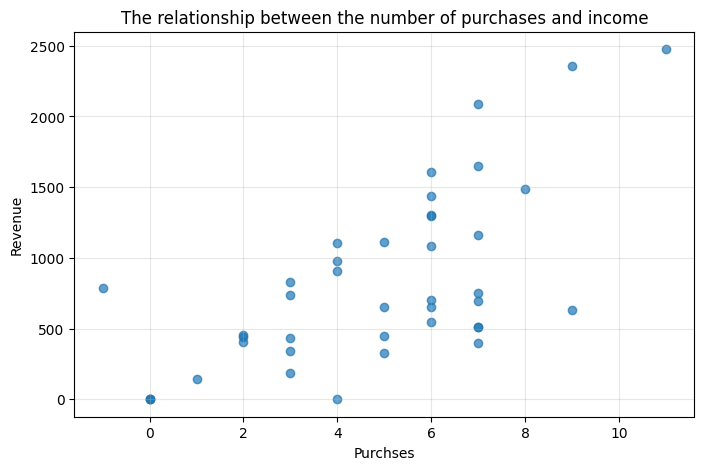

In [2]:
plt.figure(figsize = (8, 5))
plt.scatter(df['purchases'], df['revenue'], alpha = 0.7)

plt.title('The relationship between the number of purchases and income')
plt.xlabel('Purchses')
plt.ylabel('Revenue')
plt.grid(alpha = 0.3)
plt.savefig("scatter.png", dpi=300)
plt.show()